## Question 2

## Leave-One-Out Cross Validation

A special case of K-Fold cross-validation is Leave-One-Out cross- validation
where K (i.e., the number of folds/subsets) is equal to the size of the
training dataset. In each iteration, one training data point is used as the
validation set and the other data points as training data points.

In [1]:
#importing libraries
library(ggplot2)
library(reshape2)

In [2]:
#reading train data
train_data <- read.csv("Task1A_train.csv")
head(train_data)

x1,y
<dbl>,<dbl>
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


In [3]:
#split the train data into data which consists of only 'x1' column
train_dataa <- train_data['x1']
head(train_dataa)

x1
<dbl>
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


In [4]:
#split the train data into label  which consists of only 'y' column
train_label <- train_data['y']
head(train_label)

y
<dbl>
0.71
0.85
0.61
0.92
0.72
0.92


## KNN regressor:

A KNN regressor is similar to a KNN classifier , finds the K nearest neighbors and estimates the value of the given
test point based on the values of its neighbours. The main difference between KNN
regression and KNN classification is that KNN classifier returns the label that has
the majority vote in the neighborhood, whilst KNN regressor returns the average
of the neighbors’ values. 

In [5]:
#using knn classification algorithm, for each test data point, we will predict the test label based on the nearest train data points
knnregressor <- function(train.data, train.label, test.data, K = 5, distance = 'manhattan'){
    
    #getting the length of train and test data points
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    #for each test data point, we will calculate the distance of that particular test data point with respect to all training data points, and then select
    #an appropriate portion of it. Here, we will add one more parameter drop , in order to overwrite the distance of each samples for each fold.
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len+1):(test.len+train.len), drop = FALSE]
    
    test_label_predicted <- c()
    
    #we will traverse through via for loop for all the test data points, and for each test data point, the portion of train data points obtained are sorted 
    #based on the distances and the average of those train label points is estimated as the label for test data point.
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test_label_predicted[i] <- mean(train.label[nn,])
    }
    return (test_label_predicted)
}

## Question 2.1 Implementing a Leave-One-Out cross-validation (CV) function for KNN regressor function

In [6]:
cv <- function(train_dataa, train_label, K, numFold = length(train_dataa)){
    
    #we are initialzing the vector, which returns mean of all the obtained test labels from knnregressor function
    cv_folds_errors <- c()

    #using for loop we will traverse through all the numFolds, which is equal to the size of training dataset
    for (i in 1:42){
                
        #below parameter values represent train-data, where when we traverse through the complete size of training dataset, except the index i.e. representing
        #remaning all the points are considered as train data points
        t1_data <- train_dataa[-i,1]
        t1_label <- train_label[-i,1]
        
        #below parameter values represent test-data point i.e. the value present in the index is testing data point point.
        t2_data <- train_dataa[i,1]
        t2_label <- train_label[i,1]
        
        #we are converting it into the data frame, because these values must be passed to the knnregressor function, which is functioned above based on the
        #dataframe and the column names has been initialized to overcome the inconsistency of label names when they are converted into the dataframe. If we dont 
        #mention the column names, dataframe takes other column names
        t1_data1 <- data.frame('x1' = t1_data)
        t1_label1 <- data.frame('y' = t1_label)
        
        t2_data1 <- data.frame('x1' = t2_data)
        t2_label1 <- data.frame('y' = t2_label)
        
        #calling the knnregressor function for each fold of LOOCV and returning the errors using rmse for each test data point 
        cv_folds_errors[i] <- sqrt(sum((knnregressor(t1_data1, t1_label1, t2_data1, K = K) - t2_label1) ** 2)/ nrow(t2_data1))

     }
    #returning average error for all folds
    return (mean(cv_folds_errors))
    }

In [7]:
#calling cv function with the required parameters
cv(train_dataa, train_label, K = 2 )

[1] 0.3934524

## Question 2.2

Using the training data in Question 1, run your Leave-One-Out CV. Change
the value of K=1,..,15 in your KNN regressor, and for each K compute the
average of error values you have got for folds. Plot the average of error
values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your
Jupyter Notebook file for Question 2.

In [8]:
#creating a dataframe to record all the errors with respect to the 'k' value
average_error_folds <- data.frame('K' = 1:15 , 'errors' = 1:15 )
#traversing through the for loop for all k values, and noting the errors generated via cv function
for (i in 1:15){
    
    average_error_folds[i,'K'] = i
    average_error_folds[i, 'errors'] = cv(train_dataa, train_label, i, 42)
    
}

In [9]:
#printing the dataframe
average_error_folds

K,errors
<int>,<dbl>
1,0.4911905
2,0.3934524
3,0.3615873
4,0.3113690
5,0.3819524
6,0.4253571
7,0.4668367
8,0.5256845
9,0.5667989


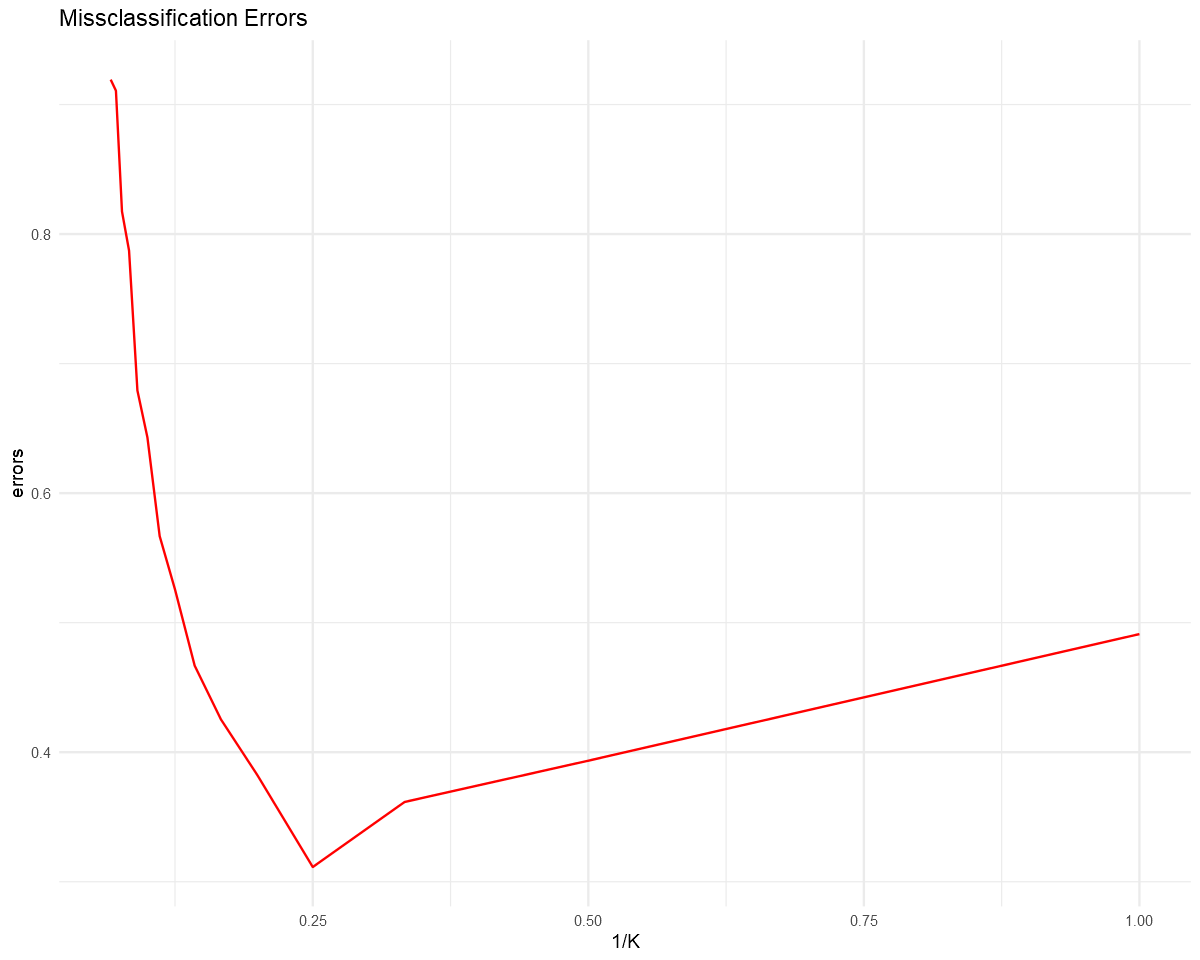

In [10]:
#Drawing ggplot for 1/k values versus errors
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(data = average_error_folds, aes(x = 1/K, y = errors)) + geom_line(color = "red" ) +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Errors")

## Question 2.3

## Report the optimum value of k

1.The optimum value of 1/K is observed at the point where the local minimum is observed. Always the point that is having the local minimum is considered as the best optimum value.

2.1/k = 0.25 is having the local minimum -> k = 1/0.25 = 100/25 = 4 

Therefore, k = 4 is having the best optimum value from the above drawn graph for missclassifications of errors with respect to 1/k value.